In [4]:
import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
import math

In [5]:
EDF =pd.read_csv(r"C:\Users\msi\Downloads\Dataset_CB.csv")

In [6]:
EDF.columns = ["DATE","CONSO"]

EDF.DATE = pd.to_datetime(EDF.DATE,format='%d/%m/%y %H:%M')

print("shape = ",EDF.shape)

EDF=EDF.set_index('DATE')
#EDF["CONSO"] = EDF["CONSO"].apply(lambda x: np.log(x))

shape =  (744, 2)


In [7]:
EDF

,CONSO
DATE,
2023-08-01 00:00:00,522.646044
2023-08-01 01:00:00,142.889213
2023-08-01 02:00:00,497.052422
2023-08-01 03:00:00,110.082063
2023-08-01 04:00:00,333.036926
...,...
2023-08-31 19:00:00,1216.824530
2023-08-31 20:00:00,1867.397655
2023-08-31 21:00:00,6456.590007


In [8]:
training_EDF_len = math.ceil(len(EDF) * .8)
training_EDF_len



596

In [9]:
train_EDF = EDF[:training_EDF_len].iloc[:,:1]
test_EDF = EDF[training_EDF_len:].iloc[:,:1]
print(train_EDF.shape, test_EDF.shape)

(596, 1) (148, 1)


In [10]:
train_EDF

,CONSO
DATE,
2023-08-01 00:00:00,522.646044
2023-08-01 01:00:00,142.889213
2023-08-01 02:00:00,497.052422
2023-08-01 03:00:00,110.082063
2023-08-01 04:00:00,333.036926
...,...
2023-08-25 15:00:00,581.244534
2023-08-25 16:00:00,434.610419
2023-08-25 17:00:00,696.951697


In [11]:
train_EDF.shape

(596, 1)

In [12]:
EDFset_train = train_EDF.CONSO.values


In [13]:
EDFset_train

array([  522.64604359,   142.88921306,   497.05242185,   110.08206267,
         333.03692626,   487.58771108,   786.16620141,  2030.885859  ,
        2773.76486152,   664.73158174,   806.66327866,   615.74867269,
        1400.85901107,  1492.32888151,   397.18863734,   795.46046206,
         691.36503787,   474.56945737,  2726.91820691,  1027.534745  ,
        2912.75415406,  2616.50426126,   849.64735324,   623.80383116,
          85.99087314,   633.02072619,   193.16278711,   591.35419683,
         135.3001498 ,  1196.56347072,   367.85408017,  2019.74065983,
        2926.04332614,   550.17651164,  1004.3053621 ,   379.14841836,
        1771.61154111,  1691.19373664,   434.61950221,   749.47977568,
         247.43077243,  1032.14862247,   837.60793777,  4433.49556009,
        1034.34626836,  8216.60759195,   496.51490621,  1013.21466444,
         240.01111061,   187.84984605,   629.35537618,   288.71084317,
         727.40487945,   426.00437325,   834.13665153,  1420.57390417,
      

In [14]:
EDFset_train = np.reshape(EDFset_train, (-1,1))
EDFset_train.shape

(596, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalerEDF = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaledEDF_train = scalerEDF.fit_transform(EDFset_train)

print(scaledEDF_train[:5])

[[0.04068791]
 [0.00862276]
 [0.03852689]
 [0.00585266]
 [0.02467807]]


In [16]:
# Selecting Open Price values
EDFset_test = test_EDF.CONSO.values
# Reshaping 1D to 2D array
EDFset_test = np.reshape(EDFset_test, (-1,1))
# Normalizing values between 0 and 1
scaledEDF_test = scalerEDF.fit_transform(EDFset_test)
print(*scaledEDF_test[:5])

[0.33876887] [0.49149945] [0.23160285] [0.03735766] [0.02130663]


In [17]:
X_EDF = []
y_EDF = []
for i in range(24, len(scaledEDF_train)):
    X_EDF.append(scaledEDF_train[i-24:i, 0])
    y_EDF.append(scaledEDF_train[i, 0])
    if i <= 25:
        print(f"X EDF{X_EDF}")
        print(f" y EDF{y_EDF}")
        print()

X EDF[array([0.04068791, 0.00862276, 0.03852689, 0.00585266, 0.02467807,
       0.03772773, 0.0629385 , 0.16803766, 0.23076339, 0.05268505,
       0.06466919, 0.04854913, 0.11484071, 0.12256406, 0.03009479,
       0.06372327, 0.05493387, 0.03662852, 0.22680785, 0.0833187 ,
       0.24249909, 0.21748494, 0.0682986 , 0.04922927])]
 y EDF[0.0038184927973427193]

X EDF[array([0.04068791, 0.00862276, 0.03852689, 0.00585266, 0.02467807,
       0.03772773, 0.0629385 , 0.16803766, 0.23076339, 0.05268505,
       0.06466919, 0.04854913, 0.11484071, 0.12256406, 0.03009479,
       0.06372327, 0.05493387, 0.03662852, 0.22680785, 0.0833187 ,
       0.24249909, 0.21748494, 0.0682986 , 0.04922927]), array([0.00862276, 0.03852689, 0.00585266, 0.02467807, 0.03772773,
       0.0629385 , 0.16803766, 0.23076339, 0.05268505, 0.06466919,
       0.04854913, 0.11484071, 0.12256406, 0.03009479, 0.06372327,
       0.05493387, 0.03662852, 0.22680785, 0.0833187 , 0.24249909,
       0.21748494, 0.0682986 , 0.049229

In [18]:
X_testEDF = []
y_testEDF = []
for i in range(24,len(scaledEDF_test)):
    X_testEDF.append(scaledEDF_test[i-24:i, 0])
    y_testEDF.append(scaledEDF_test[i, 0])

In [19]:
###########################################################
# The data is converted to Numpy array
X_EDF, y_EDF = np.array(X_EDF), np.array(y_EDF)

#Reshaping
X_EDF = np.reshape(X_EDF, (X_EDF.shape[0], X_EDF.shape[1],1))
y_EDF = np.reshape(y_EDF, (y_EDF.shape[0],1))
print("X_EDF :",X_EDF.shape,"y_EDF :",y_EDF.shape)

X_EDF : (572, 24, 1) y_EDF : (572, 1)


In [20]:
# The data is converted to numpy array
X_testEDF, y_testEDF = np.array(X_testEDF), np.array(y_testEDF)

#Reshaping
X_testEDF = np.reshape(X_testEDF, (X_testEDF.shape[0], X_testEDF.shape[1],1))
y_testEDF = np.reshape(y_testEDF, (y_testEDF.shape[0],1))
print("X_testEDF :",X_testEDF.shape,"y_testEDF :",y_testEDF.shape)

X_testEDF : (124, 24, 1) y_testEDF : (124, 1)


In [21]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers.legacy import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

In [22]:
# initializing the RNN
regressorEDF = Sequential()

# adding RNN layers and dropout regularization
regressorEDF.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_EDF.shape[1],1)))
regressorEDF.add(Dropout(0.2))

regressorEDF.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressorEDF.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressorEDF.add( SimpleRNN(units = 50))


regressorEDF.add(Dense(units = 1, activation='sigmoid'))


regressorEDF.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")


In [23]:
regressorEDF.fit(X_EDF, y_EDF, epochs = 40, batch_size = 2)
regressorEDF.summary()

Epoch 1/40

286/286 [==============================] - 4s 8ms/step - loss: 0.0162
Epoch 2/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0144
Epoch 3/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0144
Epoch 4/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0145
Epoch 5/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0145
Epoch 6/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0129
Epoch 7/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0127
Epoch 8/40
286/286 [==============================] - 2s 8ms/step - loss: 0.0125
Epoch 9/40
286/286 [==============================] - 2s 7ms/step - loss: 0.0127
Epoch 10/40
286/286 [==============================] - 2s 7ms/step - loss: 0.0115
Epoch 11/40
286/286 [==============================] - 2s 7ms/step - loss: 0.0097
Epoch 12/40
286/286 [==============================] - 2s 7ms/step - loss: 0.0096
Epoch 13/40
286/286 [===

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialisation du modèle
regressorLSTMEDF = Sequential()

# Ajout des couches LSTM
regressorLSTMEDF.add(LSTM(50, return_sequences=True, input_shape=(X_EDF.shape[1], 1))) # activation relu dans LSTM
regressorLSTMEDF.add(Dropout(0.2))
regressorLSTMEDF.add(LSTM(50, return_sequences=False)) # une autre couche LSTM avec relu

regressorLSTMEDF.add(Dense(25)) # couche Dense avec activation relu
#regressorLSTMEDF.add(LSTM(50, return_sequences=False))
#regressorLSTMEDF.add(LSTM(30, return_sequences=False))
#regressorLSTMEDF.add(LSTM(24, return_sequences=False))
# Ajout de la couche de sortie
regressorLSTMEDF.add(Dense(1,
                       activation='sigmoid')) # couche de sortie avec activation sigmoid

# Compilation du modèle
regressorLSTMEDF.compile(optimizer=SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True), loss='mean_squared_error', metrics=["accuracy"])

# Entraînement du modèle
regressorLSTMEDF.fit(X_EDF, y_EDF, batch_size=1, epochs=20)

# Résumé du modèle
regressorLSTMEDF.summary()


Epoch 1/20

572/572 [==============================] - 6s 8ms/step - loss: 0.0178 - accuracy: 0.0017
Epoch 2/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0144 - accuracy: 0.0017
Epoch 3/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0142 - accuracy: 0.0017
Epoch 4/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.0017
Epoch 5/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0144 - accuracy: 0.0017
Epoch 6/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.0017
Epoch 7/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.0017
Epoch 8/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.0017
Epoch 9/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.0017
Epoch 10/20
572/572 [==============================] - 4s 7ms/step - loss: 0.0143 - accuracy: 0.001

In [25]:
#Initialising the model
regressorGRUEDF = Sequential()

# GRU layers with Dropout regularisation
regressorGRUEDF.add(GRU(units=50,
                     return_sequences=True,
                     input_shape=(X_EDF.shape[1],1),
                     activation='tanh'))
regressorGRUEDF.add(Dropout(0.2))

regressorGRUEDF.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRUEDF.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRUEDF.add(GRU(units=50,
                     activation='tanh'))

# The output layer
regressorGRUEDF.add(Dense(units=1,
                       activation='sigmoid'))
# Compiling the RNN
regressorGRUEDF.compile(optimizer='adam',
                     loss='mean_squared_error')

# Fitting the data
regressorGRUEDF.fit( X_EDF,y_EDF, epochs=60 , batch_size=1)
regressorGRUEDF.summary()


Epoch 1/60
572/572 [==============================] - 12s 14ms/step - loss: 0.0175
Epoch 2/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0145
Epoch 3/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0145
Epoch 4/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0126
Epoch 5/60
572/572 [==============================] - 8s 13ms/step - loss: 0.0124
Epoch 6/60
572/572 [==============================] - 8s 13ms/step - loss: 0.0119
Epoch 7/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0117
Epoch 8/60
572/572 [==============================] - 8s 13ms/step - loss: 0.0115
Epoch 9/60
572/572 [==============================] - 8s 13ms/step - loss: 0.0119
Epoch 10/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0115
Epoch 11/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0107
Epoch 12/60
572/572 [==============================] - 8s 14ms/step - loss: 0.0120
Epoch 13/60

| X1 | X2 | X3 | X4 | ... | X22 | X23 | X24 | |  | Y |
|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|--------|
| x<sub>1 | x<sub>2 | x<sub>3 | x<sub>4 | ... | x<sub>22 | x<sub>23 | x<sub>24 |  |  | x<sub>25 |
| x<sub>2 | x<sub>3 | x<sub>4| x<sub>5 | ... | x<sub>23 | x<sub>24 | x<sub>25 |  |  | x<sub>26  |
| x<sub>3 | x<sub>4 | x<sub>5 | x<sub>6 | ... | x<sub>24 | x<sub>25 | x<sub>26|  |  | x<sub>27  |
| : | : | : | : | ... | : | : | : |  |  | :  |
| . | . | . | . | ... | . | . | . |  |  | .  |
| x<sub>n-25</sub> | x<sub>n-26</sub> | x<sub>n-27</sub> | x<sub>n-28</sub> | ... | x<sub>n-4</sub> | x<sub>n-3</sub> | x<sub>n-2</sub> |  |  | x<sub>n-1</sub>  |
|  x<sub>n-24</sub>| x<sub>n-23</sub> | x<sub>n-22</sub> | x<sub>n-23</sub> | ... | x<sub>n-3</sub> | x<sub>n-2</sub> | x<sub>n-1</sub> |  |  | x<sub>n</sub>  |







In [26]:
y_RNNEDF = regressorEDF.predict(X_testEDF)
y_LSTMEDF = regressorLSTMEDF.predict(X_testEDF)
y_GRUEDF = regressorGRUEDF.predict(X_testEDF)

4/4 [==============================] - 1s 10ms/step


In [27]:
y_RNN_OEDF = scalerEDF.inverse_transform(y_RNNEDF)
y_LSTM_OEDF = scalerEDF.inverse_transform(y_LSTMEDF)
y_GRU_OEDF = scalerEDF.inverse_transform(y_GRUEDF)

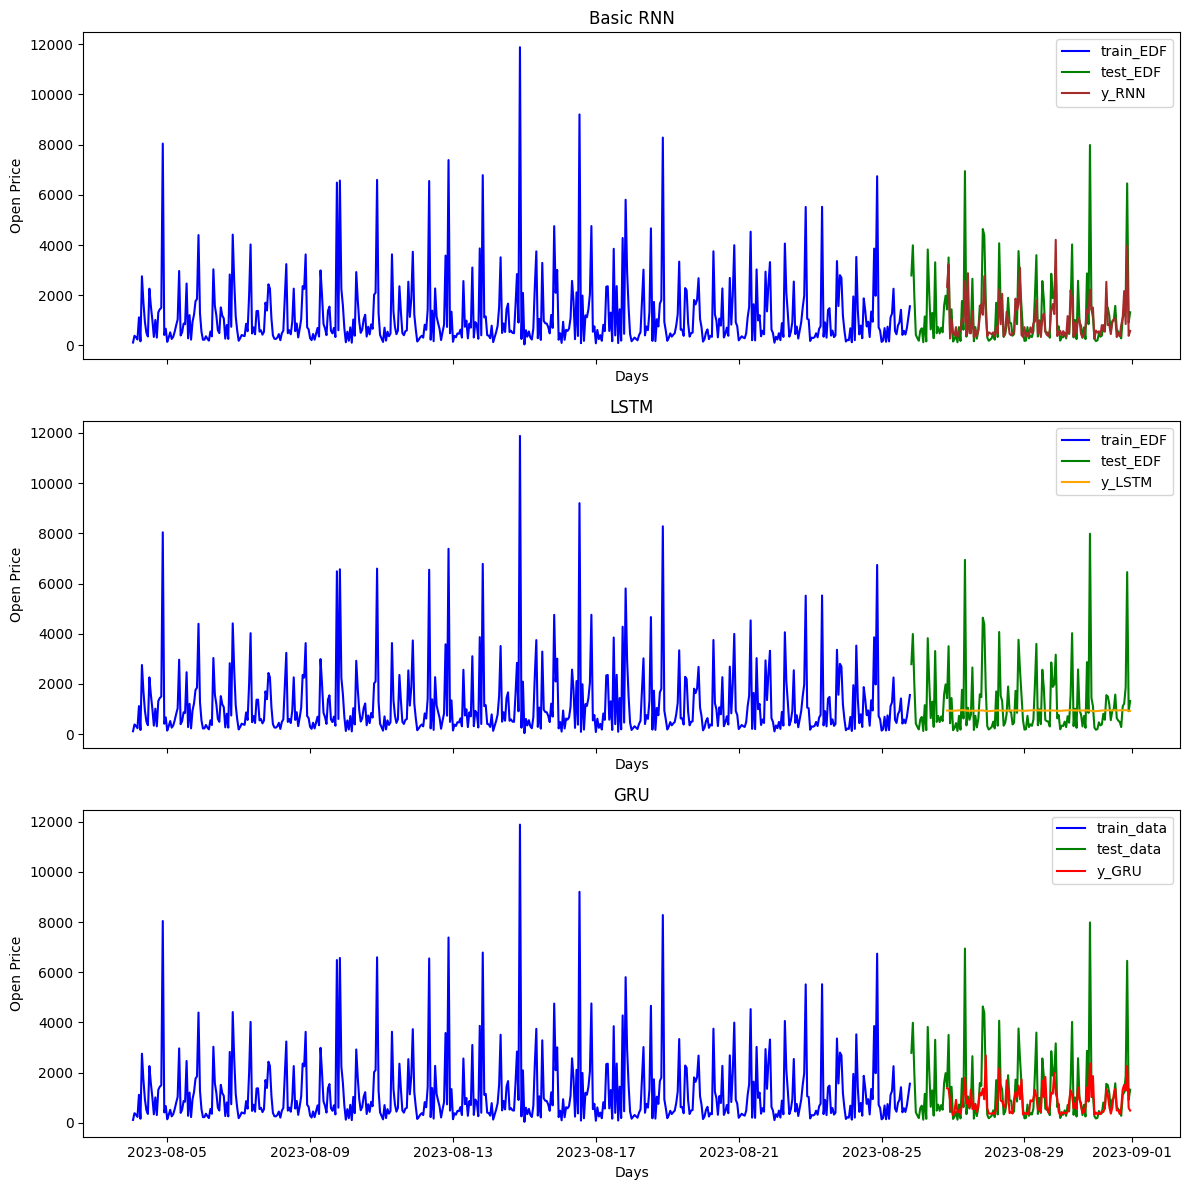

In [29]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

# Plot for RNN predictions
axs[0].plot(train_EDF.index[73:], train_EDF.CONSO[73:], label="train_EDF", color="blue")
axs[0].plot(test_EDF.index, test_EDF.CONSO, label="test_EDF", color="green")
axs[0].plot(test_EDF.index[24:], list(y_RNN_OEDF.reshape(-1)), label="y_RNN", color="brown")
axs[0].set_title("Basic RNN")

# Plot for LSTM predictions
axs[1].plot(train_EDF.index[73:], train_EDF.CONSO[73:], label="train_EDF", color="blue")
axs[1].plot(test_EDF.index, test_EDF.CONSO, label="test_EDF", color="green")
axs[1].plot(test_EDF.index[24:], list(y_LSTM_OEDF.reshape(-1)), label="y_LSTM", color="orange")
axs[1].set_title("LSTM")

# Plot for GRU predictions
axs[2].plot(train_EDF.index[73:], train_EDF.CONSO[73:], label="train_data", color="blue")
axs[2].plot(test_EDF.index, test_EDF.CONSO, label="test_data", color="green")
axs[2].plot(test_EDF.index[24:], list(y_GRU_OEDF.reshape(-1)), label="y_GRU", color="red")
axs[2].set_title("GRU")

# Set labels and legends
for ax in axs:
    ax.set_xlabel("Days")
    ax.set_ylabel("Open Price")
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [30]:
predict = np.log(list(y_RNN_OEDF.reshape(1,-1)[0]))
test_EDF = np.log(EDF[620:].iloc[:,:1])


In [31]:
from sklearn.metrics import mean_squared_error



# Calcul de la MSE
mse = mean_squared_error(predict, test_EDF)
print("MSE:", mse)

MSE: 0.3416818943711695


In [32]:
from sklearn.metrics import mean_squared_error
predict = np.log(list(y_GRU_OEDF.reshape(1,-1)[0]))
test_EDF = np.log(EDF[620:].iloc[:,:1])


# Calcul de la MSE
mse = mean_squared_error(predict, test_EDF)
print("MSE:", mse)

MSE: 0.4210907982187295
